# Mark Lewis - Cyber threat detection using feature engineering, feature selection and optimised classification

# 1) Download and Install **libraries**

In [ ]:
try:
  # Import General Use libraries
  !pip install phate scikit-optimize umap-learn
except:
  pass

import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import read_csv
from pandas import set_option


import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)

gpus = tf.config.experimental.list_physical_devices('GPU')
print('GPU: ',gpus)

seed = 1
np.random.seed(seed)

     |████████████████████████████████| 100 kB 4.3 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 416 kB 39.3 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 104 kB 54.1 MB/s 
     |████████████████████████████████| 1.8 MB 50.4 MB/s 
     |████████████████████████████████| 1.1 MB 53.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=bffbf32e022c0a8f3e000f240fb3f38dbc30e8ca6175ecbe18b8b7ad95c95a5c
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=1f1be32456fdd449b310e9836f41b9842b5916ae5a6ca60ca7ee56c82960d769
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
Python version :  3.7.12 

# 2) Mount **Google Drive**

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3) **Load Data** From CSV and Rename Class Variable

In [ ]:
# # Load CSV using Pandas
# np.random.seed(None)

# SET PANDAS DISPLAY OPTIONS
pd.reset_option("max_rows")
pd.reset_option("max_columns")
pd.reset_option('precision')


# Get the training set --------------
x_train = pd.read_csv('/content/drive/MyDrive/AML_CW/train_imperson_without4n7_balanced_data.csv',delimiter=',')
x_train.rename(columns={'155': 'class'}, inplace = True)
print(x_train.head())


# Get the test set --------------
x_test = pd.read_csv('/content/drive/MyDrive/AML_CW/test_imperson_without4n7_balanced_data.csv',delimiter=',')
x_test.rename(columns={'155': 'class'}, inplace = True)
print(x_test.head())

   1  2  3         5         6         8  ...  150  151  152  153  154  class
0  0  0  0  0.000066  0.000066  0.009150  ...    0    0    0    0  0.0      0
1  0  0  0  0.000014  0.000014  0.000000  ...    0    0    0    0  0.0      0
2  0  0  0  0.035528  0.035528  0.070588  ...    0    0    0    0  0.0      0
3  0  0  0  0.005128  0.005128  0.094771  ...    0    0    0    0  0.0      0
4  0  0  0  0.035116  0.035116  0.070588  ...    0    0    0    0  0.0      0

[5 rows x 153 columns]
   1  2  3         5         6        8  ...  150  151  152  153      154  class
0  0  0  0  0.002547  0.002547  0.98824  ...    0    0    0    0  0.98674      0
1  0  0  0  0.003296  0.003296  0.98824  ...    0    0    0    0  0.98674      0
2  0  0  0  0.003285  0.003285  0.98824  ...    0    0    0    0  0.98674      0
3  0  0  0  0.005942  0.005942  0.00000  ...    0    0    0    0  0.00000      0
4  0  0  0  0.001519  0.001519  0.98824  ...    0    0    0    0  0.98674      0

[5 rows x 153 columns

# ------DATA EXPLORATION---------------------------------------------------------------------------------

# 4) Initial Data **Observations**

In [ ]:
# pd.set_option('precision', 24)
pd.set_option('display.max_columns', 155)
pd.set_option('display.max_rows', 155)
pd.set_option('display.width', 250)

print(x_test.describe())

# ReSET PANDAS DISPLAY OPTIONS
pd.reset_option("max_rows")
pd.reset_option("max_columns")
pd.reset_option('precision')
pd.reset_option('display.width')

             1        2        3             5             6             8             9       10       11       12       13            14            15            16       17            18       19            20       21       22       23  \
count  40158.0  40158.0  40158.0  40158.000000  40158.000000  40158.000000  40158.000000  40158.0  40158.0  40158.0  40158.0  40158.000000  40158.000000  40158.000000  40158.0  40158.000000  40158.0  40158.000000  40158.0  40158.0  40158.0   
mean       0.0      0.0      0.0      0.005080      0.005080      0.200639      0.200639      0.0      0.0      0.0      0.0      0.999701      0.999701      0.999701      1.0      0.999701      0.0      0.999701      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.016192      0.016192      0.371463      0.371463      0.0      0.0      0.0      0.0      0.017284      0.017284      0.017284      0.0      0.017284      0.0      0.017284      0.0      0.0      0.0   
min        0.0      0.0     

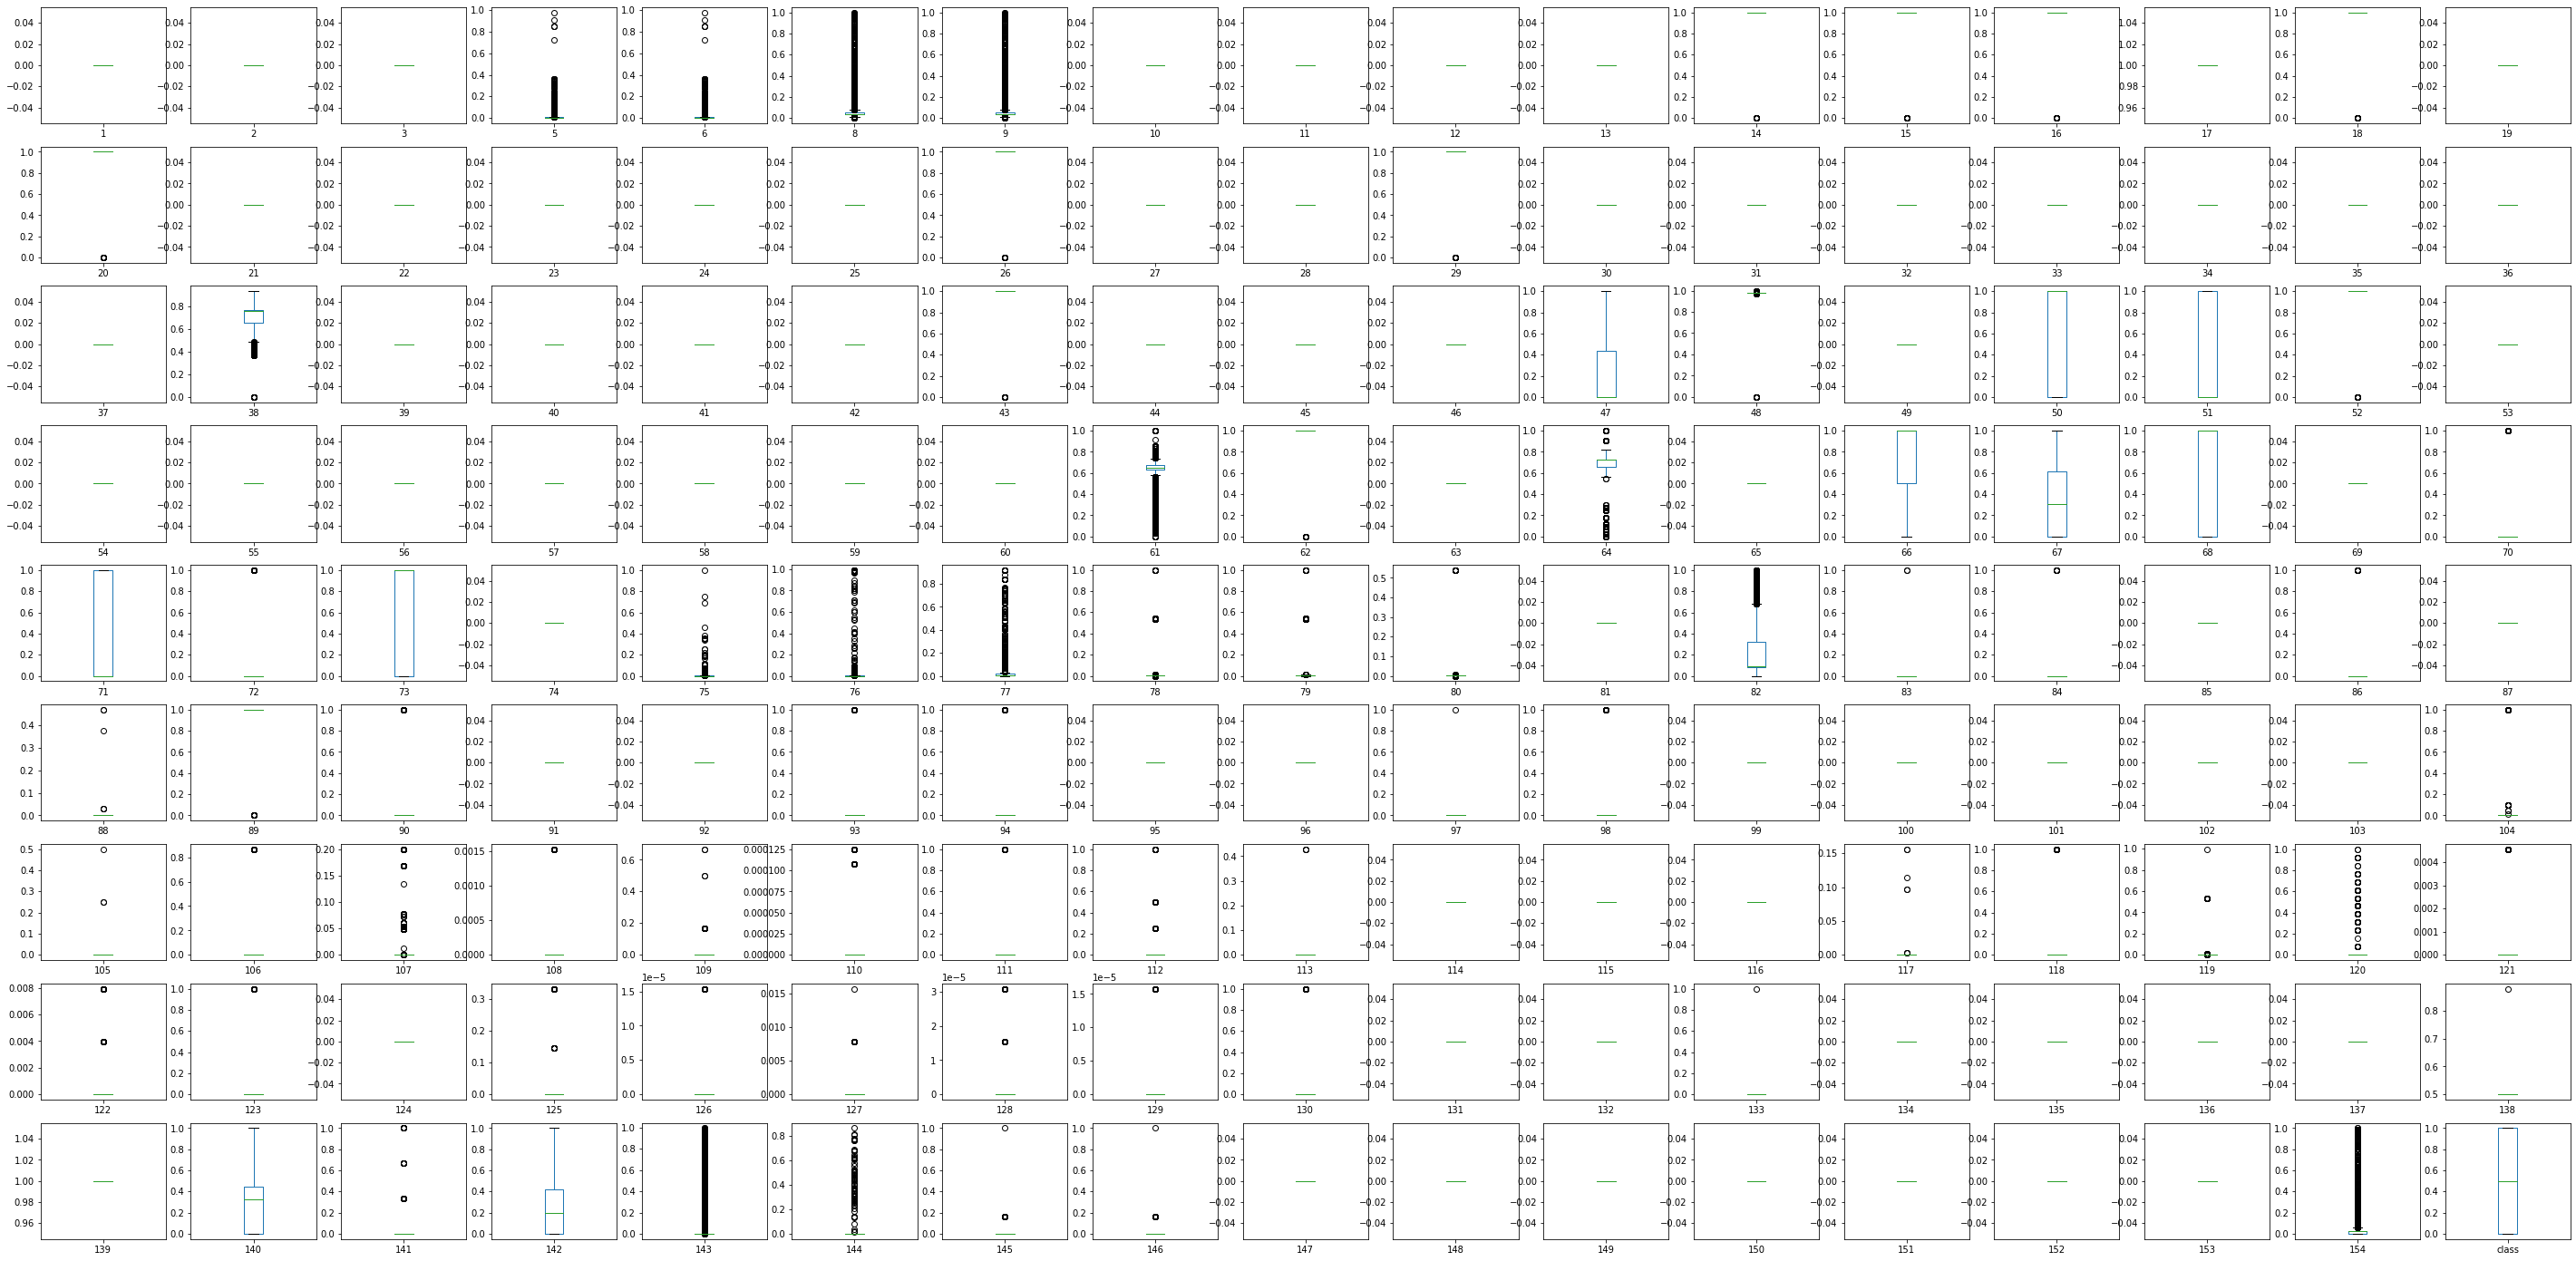

In [ ]:
from matplotlib import pyplot
x_train.plot(kind='box', subplots=True, layout=(9,17), sharex=False, sharey=False, figsize = (50,25))
pyplot.show()

In [ ]:
# find correllation between features

# create correlation mmatrix
correlations = x_train.corr(method='pearson')

# Select upper triangle of correlation matrix
upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))

# Find features with correlation greater of 1
corr_is_one = [column for column in upper.columns if any(upper[column] >= 1.0)]

# Select upper triangle of correlation matrix
upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))

# Find features with correlation of -1 
corr_is_minus_one = [column for column in upper.columns if any(upper[column] <= -1.0)]

print('List of features to drop due to correlation = 1',corr_is_one)
print('List of features to drop due to correlation = -1',corr_is_minus_one)

# # Drop features 
# df.drop(to_drop, axis=1, inplace=True)

pd.set_option('display.max_columns', 155)
pd.set_option('display.max_rows', 155)
pd.set_option('display.width', 200)

# print(correlations)
print(correlations.shape)

# ReSET PANDAS DISPLAY OPTIONS
pd.reset_option("max_rows")
pd.reset_option("max_columns")
pd.reset_option('precision')
pd.reset_option('display.width')

List of features to drop due to correlation = 1 ['6', '9', '15', '16', '18', '20', '26', '29', '43', '52', '62', '89', '129', '130', '133', '146']
List of features to drop due to correlation = -1 []
(153, 153)


**Anommolies in the data:**

Features with a Correlation of 1 :
* 5 and 6
* 8 and 9
* 14, 15, 16, 18, 20, 26, 29, 43, 52 and 62

In [ ]:
# find collumns with only zeros
Empty_columns_zeros = []
count = 0
percentage_zeros = 100.0 #percentage threshold of zeros or NaN missing values
percent_zeros = 100 - (x_train.sum() * 100 / len(x_train))

for i in range(len(x_train.columns)):
  if percent_zeros[i] >= percentage_zeros:
    # print('columns with all zeros: ',x_train.columns[i]) 
    Empty_columns_zeros.append(x_train.columns[i])
    count += 1

print('there are',count,'features with only zeros')
print('List of Empty Features: ', Empty_columns_zeros)

there are 72 features with only zeros
List of Empty Features:  ['1', '2', '3', '10', '11', '12', '13', '19', '21', '22', '23', '24', '25', '27', '28', '30', '31', '32', '33', '34', '35', '36', '37', '39', '40', '41', '42', '44', '45', '46', '49', '53', '54', '55', '56', '57', '58', '59', '60', '63', '65', '69', '74', '81', '85', '87', '91', '92', '95', '96', '99', '100', '101', '102', '103', '114', '115', '116', '124', '131', '132', '134', '135', '136', '137', '147', '148', '149', '150', '151', '152', '153']


In [ ]:
# find collumns with only ones
Empty_columns_ones = []
count = 0
percentage_ones = 100 #percentage threshold of ones 
percent_ones = x_train.sum() * 100 / len(x_train)

for i in range(len(x_train.columns)):
  if percent_ones[i] >= percentage_ones:
    # print('columns with all zeros: ',x_train.columns[i]) 
    Empty_columns_ones.append(x_train.columns[i])
    count += 1

print('there are',count,'features with only ones')
print('List of Empty Features: ', Empty_columns_ones)

there are 2 features with only ones
List of Empty Features:  ['17', '139']


In [ ]:
# concatinate the lists of cor=1, cor=-1 and zero percent = 100
drop_columms = Empty_columns_zeros + Empty_columns_ones + corr_is_one + corr_is_minus_one
drop_columms = [int(x) for x in drop_columms]
drop_columms.sort()
drop_columms = [str(x) for x in drop_columms]

# the following columns contain no useful informmation that is not already represented in the other features
print('These',len(drop_columms),'features contain no useful data in the training set provided: ', drop_columms)



These 90 features contain no useful data in the training set provided:  ['1', '2', '3', '6', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '39', '40', '41', '42', '43', '44', '45', '46', '49', '52', '53', '54', '55', '56', '57', '58', '59', '60', '62', '63', '65', '69', '74', '81', '85', '87', '89', '91', '92', '95', '96', '99', '100', '101', '102', '103', '114', '115', '116', '124', '129', '130', '131', '132', '133', '134', '135', '136', '137', '139', '146', '147', '148', '149', '150', '151', '152', '153']


I would normmally drop the columns listed above as they add nothing to the dataset, however the coursework brief specified that we should only scale/transformm and add new feaures to the dataset. 

From a data sccience perspective, this doesnt seem to make sense, however from a practical perspective, simmmply because informmation is not found within this particular test set, the features are unique and it is possible for a variation in the data to occur which mmmay be useful - we just didnt see it. besides, this will be handled later during feature reduction and selection

In [ ]:
# # Remove features using the drop_columms list
# x_train.drop(drop_columms, axis = 1, inplace = True)
# x_test.drop(drop_columms, axis = 1, inplace = True)

# # print(x_train_stripped.describe())
# print(x_train.shape)
# print(x_test.shape)

# 5) **Pre-Processing** Data

In [ ]:
feat_anal_pre = pd.concat([
                       x_train.min(),
                       x_train.max(),
                       x_train.mean(),
                       x_train.std(),
                       x_train.dtypes,
                       x_train.kurtosis(),
                       x_train.skew(),
                       x_train.nunique()
                       ], axis=1, join="inner")

colummn_names = ['min_pre', 'max_pre', 'mean_pre', 'StD_pre', 'dtypes_pre', 'kurtosis_pre', 'skew_pre',  'Unique_pre']
feat_anal_pre.set_axis(colummn_names, axis=1, inplace=True)


############################################################################################

# make a list of features with abs skew >= 3 or <= -3, kurtosis >= 10, type = float and Unique > 100
skew = x_train.skew()
dtype = x_train.dtypes
unique = x_train.nunique()
kurt = x_train.kurtosis()
minim = x_train.min()
maxim = x_train.max()

Power_Xform_list = []

for i in range(len(x_train.columns)):
  if abs(skew[i]) >= 1:
    if dtype[i] == 'float64':
      if unique[i] >= 100:
        Power_Xform_list.append(x_train.columns[i])
print('Power_Xform_list: ', Power_Xform_list)


from sklearn.preprocessing import PowerTransformer
tranform = PowerTransformer(method='yeo-johnson')
# fit and transfor the trakning set
x_train[Power_Xform_list] = tranform.fit_transform(x_train[Power_Xform_list])
# just transform the test set
x_test[Power_Xform_list] = tranform.transform(x_test[Power_Xform_list])

############################################################################################

skew = x_train.skew()
dtype = x_train.dtypes
unique = x_train.nunique()
kurt = x_train.kurtosis()
minim = x_train.min()
maxim = x_train.max()

Standardize_list = []

for i in range(len(x_train.columns)):
  if abs(kurt[i]) >= 10:
    if dtype[i] == 'float64':
      if unique[i] >= 100:
        Standardize_list.append(x_train.columns[i])
print('Standardize_list: ',Standardize_list)

from sklearn.preprocessing import StandardScaler
Standard = StandardScaler()

# fit and standardize the trakning set
x_train[Standardize_list] = Standard.fit_transform(x_train[Standardize_list])

# just standardize the test set
x_test[Standardize_list] = Standard.transform(x_test[Standardize_list])



############################################################################################

skew = x_train.skew()
dtype = x_train.dtypes
unique = x_train.nunique()
kurt = x_train.kurtosis()
minim = x_train.min()
maxim = x_train.max()

Scale_list = []


for i in range(len(x_train.columns)):
  if maxim[i] - minim[i] > 1:
    if unique[i] > 1:
      Scale_list.append(x_train.columns[i])

for i in range(len(x_train.columns)):
  if maxim[i] - minim[i] < 0.99:
    if unique[i] > 1:
      Scale_list.append(x_train.columns[i])

Scale_list = list(dict.fromkeys(Scale_list))
print('Scale_list: ',Scale_list)


from sklearn.preprocessing import MinMaxScaler
MM_Scaler = MinMaxScaler(feature_range=(0, 1))

# fit and Scale the traning set
x_train[Scale_list] = MM_Scaler.fit_transform(x_train[Scale_list])

# just scale the test set
x_test[Scale_list] = MM_Scaler.transform(x_test[Scale_list])

############################################################################################

skew = x_train.skew()
dtype = x_train.dtypes
unique = x_train.nunique()
kurt = x_train.kurtosis()
minim = x_train.min()
maxim = x_train.max()

Binarise_list = []

for i in range(len(x_train.columns)):
  if unique[i] == 2:
    if dtype[i] == 'float64':
      Binarise_list.append(x_train.columns[i])
print('Binarise_list: ',Binarise_list)


from sklearn.preprocessing import Binarizer
Binary = Binarizer(threshold=0.5)

# fit and Scale the traning set
x_train[Binarise_list] = Binary.fit_transform(x_train[Binarise_list]).astype('int64')

# just scale the test set
x_test[Binarise_list] = Binary.transform(x_test[Binarise_list]).astype('int64')


############################################################################################


feat_anal_post = pd.concat([
                       x_train.min(),
                       x_train.max(),
                       x_train.mean(),
                       x_train.std(),
                       x_train.dtypes,
                       x_train.kurtosis(),
                       x_train.skew(),
                       x_train.nunique()
                       ], axis=1, join="inner")

colummn_names = ['min_post', 'max_post', 'mean_post', 'StD_post', 'dtypes_post', 'kurtosis_post', 'skew_post',  'Unique_post']
feat_anal_post.set_axis(colummn_names, axis=1, inplace=True)
# print(feat_anal_post)

pre_post_info = pd.concat([feat_anal_pre,feat_anal_post], axis=1, join="inner")


# make it fit on the screen
pd.set_option('display.max_rows', 155)
pd.set_option('display.max_columns', 155)
pd.set_option('display.width', 150)




# make a list of all the features that were processed
processed_data_list = []
processed_data_list = Power_Xform_list + Standardize_list + Binarise_list + Scale_list
processed_data_list = list(dict.fromkeys(processed_data_list))
print('processed_data_list:  ',processed_data_list)


# compare data metrics before and after pre-processing for only the ones that changed
print(pre_post_info.T[processed_data_list])


# ReSET PANDAS DISPLAY OPTIONS
pd.reset_option("max_columns")
pd.reset_option("max_rows")
pd.reset_option('display.width')

Power_Xform_list:  ['5', '6', '8', '9', '76', '82', '107', '143', '154']
Standardize_list:  ['107', '143']
Scale_list:  ['5', '6', '8', '9', '76', '82', '107', '143', '154', '38', '77', '80', '88', '105', '106', '108', '109', '110', '113', '117', '121', '122', '125', '126', '127', '128', '129', '138', '144']
Binarise_list:  ['106', '108', '113', '121', '126', '129', '138']
processed_data_list:   ['5', '6', '8', '9', '76', '82', '107', '143', '154', '106', '108', '113', '121', '126', '129', '138', '38', '77', '80', '88', '105', '109', '110', '117', '122', '125', '127', '128', '144']
                        5           6         8         9          76        82         107         143       154          106          108  \
min_pre          2.86e-06    2.86e-06         0         0           0         0           0           0         0            0            0   
max_pre           0.97844     0.97844         1         1     0.99099         1      0.2004     0.99424         1      0.8666

# 6) **Shuffle** the Pandas Dataframe

In [ ]:
# Shuffle the dataframe
x_train = x_train.sample(frac=1).reset_index(drop=True)
x_test = x_test.sample(frac=1).reset_index(drop=True)

# 7) Pandas Dataset **Split to NumPy** (and empty the generated features dataframe)

In [ ]:
'''
Put Data into Labelled Dataframmes
'''

# print(x_train.head())
print('x_train before : ',x_train.shape)
print('x_test before : ',x_test.shape)

# training set
x_train.np = x_train.iloc[:,0:152].to_numpy()
y_train = x_train['class']
y_train.np = y_train.to_numpy()

# test set
x_test.np = x_test.iloc[:,0:152].to_numpy()
y_test = x_test['class']
y_test.np = y_test.to_numpy()

print('x_train.np. after : ',x_train.np.shape)
print('y_train.np. after : ',y_train.np.shape)
print('x_test.np. after : ',x_test.np.shape)
print('y_test.np. after : ',y_test.np.shape)
# print(x_train.np)
# print(y_train.np)


# create empty pandas dataframe to concatinate generated features to
# Create an empty Numpy array with 4 columns or 0 rows
Gen_Feat_Train = np.empty((97044, 0), float)
Gen_Feat_Test = np.empty((40158, 0), float)

Gen_Feat_Train = pd.DataFrame(Gen_Feat_Train)
Gen_Feat_Test = pd.DataFrame(Gen_Feat_Test)

print('Gen_Feat_Train : ', Gen_Feat_Train.shape)
print('Gen_Feat_Test : ', Gen_Feat_Test.shape)

x_train before :  (97044, 153)
x_test before :  (40158, 153)
x_train.np. after :  (97044, 152)
y_train.np. after :  (97044,)
x_test.np. after :  (40158, 152)
y_test.np. after :  (40158,)
Gen_Feat_Train :  (97044, 0)
Gen_Feat_Test :  (40158, 0)


# ------FEATURE GENERATION-----------------------------------------------------------------------------



# 8) **Stacked Sparse Autoencoder** for Dimansionality Reduction and Feature Generation

In [ ]:
from __future__ import print_function
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam
import time
start = time.time()


input = Input(shape = (152,))

# encoder
encoder2 = Dense(100, activation='sigmoid')(input)
encoder3 = Dense(50, activation='softmax')(encoder2)

# Code - Sparse
encoder4 = Dense(4, activation='sigmoid', activity_regularizer = l1(1e-6), kernel_regularizer = l2(1e-6))(encoder3)

# # Code - Standard     
# encoder4 = Dense(4, activation='sigmoid', )(encoder3)                          

# Decoder
decoder2 = Dense(50, activation='sigmoid')(encoder4)
decoder3 = Dense(100, activation='sigmoid')(decoder2)
decoder4 = Dense(152, activation='sigmoid')(decoder3)

In [ ]:
# This model maps an input to it's reconstruction
autoencoder = Model(inputs=input, outputs=decoder4)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # , metrics=['accuracy']

autoencoder.fit(x_train.np, x_train.np, 
                epochs=3, 
                batch_size=128,
                shuffle=True, 
                validation_data=(x_test.np, x_test.np))

Epoch 1/3
759/759 [==============================] - 6s 6ms/step - loss: 0.1061 - val_loss: 0.1794
Epoch 2/3
759/759 [==============================] - 4s 6ms/step - loss: 0.0866 - val_loss: 0.1899
Epoch 3/3
759/759 [==============================] - 4s 6ms/step - loss: 0.0761 - val_loss: 0.1787


In [ ]:
# create encoder model
encoder = Model(inputs=input, outputs=encoder4)

# get latent vector of the model to use as new features
latent_vector_train = encoder.predict(x_train.np)
latent_vector_test = encoder.predict(x_test.np)

# # # Fit the scaler to the features and transform
# from sklearn.preprocessing import MinMaxScaler
# MM_Scaler = MinMaxScaler(feature_range=(0, 1))
# latent_vector_train = MM_Scaler.fit_transform(latent_vector_train)
# latent_vector_test = MM_Scaler.transform(latent_vector_test)

# put back into pandas and add suffix
latent_vector_train = pd.DataFrame(latent_vector_train).add_suffix('_SAE')
latent_vector_test = pd.DataFrame(latent_vector_test).add_suffix('_SAE')

# print(latent_vector_train)
print(latent_vector_train.shape)

# print(latent_vector_test)
print(latent_vector_test.shape)

# Join the generaed features onto the features dataframe
Gen_Feat_Train = pd.concat([Gen_Feat_Train,latent_vector_train], axis=1, join="inner")
Gen_Feat_Test = pd.concat([Gen_Feat_Test,latent_vector_test], axis=1, join="inner")

# check we put the data in the right places
print(latent_vector_train.shape)
print(latent_vector_test.shape)
print(latent_vector_train.shape)
print(latent_vector_test.shape)

print('Gen_Feat_Train : ', Gen_Feat_Train.shape)
print('Gen_Feat_Test : ', Gen_Feat_Test.shape)

#set feature list to include all features of Gen_Feat_Train
Feature_List = Gen_Feat_Train.columns.values

end = time.time()
runtime_SAE = str(round(end-start , 4))+'s run-time for Feature Generation'
print(runtime_SAE)

(97044, 4)
(40158, 4)
(97044, 4)
(40158, 4)
(97044, 4)
(40158, 4)
Gen_Feat_Train :  (97044, 4)
Gen_Feat_Test :  (40158, 4)
27.909s run-time for Feature Generation


In [ ]:
# Gen_Feat_Train.to_csv('SAE_Train.csv’) # relative position
# Gen_Feat_Test.to_csv('SAE_Test.csv’) # relative position

# 9) Stacked Sparse Autoencoder Optimisation using GridSearchCV

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.regularizers import l1, l2

# def create_model(act = 'sigmoid', hid_act = 'softmax', act_reg = 1e-6, kern_reg = 1e-6, ep = 3, batch = 128):
encoder = Model()

function code()

def create_model(activation, act_reg, kern_reg):
  input = Input(shape = (152,))
  # encoder
  encoder1 = Dense(100, activation)(input)
  encoder2 = Dense(50, activation ='softmax')(encoder1)
  # Code - Sparse
  code = Dense(4, activation, activity_regularizer = l1(act_reg), kernel_regularizer = l2(kern_reg))(encoder2)                        
  # Decoder
  decoder1 = Dense(50, activation)(code)
  decoder2 = Dense(100, activation)(decoder1)
  out = Dense(152, activation ='sigmoid')(decoder2)
  # This model maps an input to it's reconstruction
  autoencoder = Model(inputs=input, outputs=out)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # , metrics=['accuracy']
  return autoencoder


model = KerasClassifier(build_fn = create_model, batch_size=1000, epochs=3)
encoder = Model(inputs=input, outputs=code)

print(encoder)

#now write out all the parameters you want to try out for the grid search
activation_list = ['sigmoid']
activity_regularizer_list = [1e-6]
kernel_regularizer_list = [1e-6]

# learn_rate = [0.1, 0.2, ...]
# init = ['unform', 'normal', 'zero', ...]
# optimizer = ['SGD', 'Adam' ...]
# param_grid = dict(activation=activation, learn_rate=learn_rate, init=init, optimizer=optimizer)

param_grid = dict(activation=activation_list, 
                  act_reg = activity_regularizer_list,
                  kern_reg = kernel_regularizer_list
                  )

# define model evaluation method
cv = ShuffleSplit(n_splits=10, test_size=(40158/97044), random_state=seed)

grid = GridSearchCV(estimator = model, param_grid=param_grid, verbose=1, scoring = 'accuracy', cv=cv, n_jobs=-1)

grid_result = grid.fit(x_train.np, x_train.np, 
                epochs=3, 
                batch_size=128,  
                shuffle=True, 
                validation_data=(x_test.np, x_test.np))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
# # create encoder model
encoder = Model(inputs=input, outputs=code)

# get latent vector of the model to use as new features
latent_vector_train = encoder.predict(x_train.np)
latent_vector_test = encoder.predict(x_test.np)

# # # Fit the scaler to the features and transform
# from sklearn.preprocessing import MinMaxScaler
# MM_Scaler = MinMaxScaler(feature_range=(0, 1))
# latent_vector_train = MM_Scaler.fit_transform(latent_vector_train)
# latent_vector_test = MM_Scaler.transform(latent_vector_test)

# put back into pandas and add suffix
latent_vector_train = pd.DataFrame(latent_vector_train).add_suffix('_SAE')
latent_vector_test = pd.DataFrame(latent_vector_test).add_suffix('_SAE')

# print(latent_vector_train)
print(latent_vector_train.shape)

# print(latent_vector_test)
print(latent_vector_test.shape)

# Join the generaed features onto the features dataframe
Gen_Feat_Train = pd.concat([Gen_Feat_Train,latent_vector_train], axis=1, join="inner")
Gen_Feat_Test = pd.concat([Gen_Feat_Test,latent_vector_test], axis=1, join="inner")

# check we put the data in the right places
print(latent_vector_train.shape)
print(latent_vector_test.shape)
print(latent_vector_train)
print(latent_vector_test)

print('Gen_Feat_Train : ', Gen_Feat_Train)
print('Gen_Feat_Train : ', Gen_Feat_Train)

#set feature list to include all features of Gen_Feat_Train
Feature_List = Gen_Feat_Train.columns.values

(97044, 4)
(40158, 4)
(97044, 4)
(40158, 4)
       0_SAE_SAE  1_SAE_SAE  2_SAE_SAE  3_SAE_SAE
0       0.186711   0.216213   0.217469   0.207227
1       0.087675   0.102525   0.103121   0.098623
2       0.042653   0.049704   0.050015   0.048209
3       0.041978   0.048911   0.049217   0.047449
4       0.042652   0.049704   0.050015   0.048209
...          ...        ...        ...        ...
97039   0.042730   0.049795   0.050106   0.048296
97040   0.042735   0.049801   0.050113   0.048302
97041   0.042728   0.049793   0.050104   0.048294
97042   0.042739   0.049806   0.050117   0.048306
97043   0.042740   0.049806   0.050118   0.048307

[97044 rows x 4 columns]
       0_SAE_SAE  1_SAE_SAE  2_SAE_SAE  3_SAE_SAE
0       0.049094   0.057276   0.057630   0.055456
1       0.049065   0.057242   0.057596   0.055423
2       0.049152   0.057344   0.057699   0.055521
3       0.098623   0.115305   0.115966   0.110795
4       0.047832   0.055793   0.056139   0.054037
...          ...        ...   

# 10) **PCA** for Feature Generation

          0_PCA     1_PCA     2_PCA  ...     7_PCA     8_PCA     9_PCA
0      0.550640  0.566594  0.146304  ...  0.430744  0.337058  0.335958
1      0.456212  0.892802  0.001978  ...  0.507697  0.373927  0.404328
2      0.055976  0.934653  0.810121  ...  0.536603  0.182348  0.245703
3      0.030435  0.964118  0.912767  ...  0.483752  0.338431  0.967214
4      0.056380  0.934481  0.809766  ...  0.538018  0.180630  0.240669
...         ...       ...       ...  ...       ...       ...       ...
97039  0.044924  0.920679  0.806402  ...  0.543398  0.191552  0.191462
97040  0.044963  0.920678  0.806308  ...  0.543292  0.191534  0.191410
97041  0.044931  0.920714  0.806492  ...  0.543276  0.191486  0.191404
97042  0.044995  0.920681  0.806242  ...  0.543193  0.191512  0.191361
97043  0.045003  0.920689  0.806250  ...  0.543147  0.191493  0.191339

[97044 rows x 10 columns]
          0_PCA     1_PCA     2_PCA  ...     7_PCA     8_PCA     9_PCA
0      0.938715  0.575307  0.492109  ...  0.426495

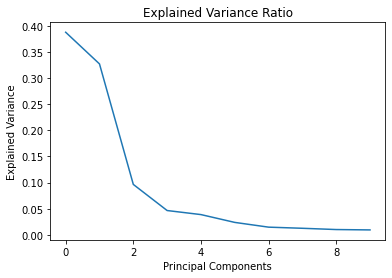

(97044, 10)
(40158, 10)
(97044, 10)
(40158, 10)
Gen_Feat_Train :  (97044, 10)
Gen_Feat_Train :  (97044, 10)
Index(['0_PCA', '1_PCA', '2_PCA', '3_PCA', '4_PCA', '5_PCA', '6_PCA', '7_PCA',
       '8_PCA', '9_PCA'],
      dtype='object')


In [ ]:
from sklearn.decomposition import PCA

import time
start = time.time()

features = 10

# Make an instanc of the Model
pca = PCA(n_components=features,
          copy = True,
          whiten = False,
          svd_solver = 'auto',
          tol = 0.0,
          iterated_power = 'auto',
          random_state = None
          )

latent_vector_train = pca.fit_transform(x_train.np)
latent_vector_test = pca.transform(x_test.np)


# # Fit the scaler to the features and transform
from sklearn.preprocessing import MinMaxScaler
MM_Scaler = MinMaxScaler(feature_range=(0, 1))
latent_vector_train = MM_Scaler.fit_transform(latent_vector_train)
latent_vector_test = MM_Scaler.transform(latent_vector_test)

# put back into pandas and add suffix
latent_vector_train = pd.DataFrame(latent_vector_train).add_suffix('_PCA')
latent_vector_test = pd.DataFrame(latent_vector_test).add_suffix('_PCA')

print(latent_vector_train)
print(latent_vector_test)
print(Gen_Feat_Train)
print(Gen_Feat_Test)

# output explained variance for new features
print('explained variance ratios', pd.DataFrame(pca.explained_variance_ratio_))
print('Total Explained Variance: ',pca.explained_variance_ratio_.sum())

# Join the generaed features onto the features dataframe
Gen_Feat_Train = pd.concat([Gen_Feat_Train,latent_vector_train], axis=1, join="inner")
Gen_Feat_Test = pd.concat([Gen_Feat_Test,latent_vector_test], axis=1, join="inner")


end = time.time()
runtime_PCA = str(round(end-start , 4))+'s run-time for Feature Generation'
print(runtime_PCA)


# Plot
plt.plot(range(0,features), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()


# # select the ten most relevant features
# from sklearn.feature_selection import RFE
# rfe = RFE(model, n_features_to_select = 10)
# fit = rfe.fit(latent_vector_train, y_train.np)

# print("Num Features: %d" % fit.n_features_)
# # print("Selected Features: %s" % fit.support_)
# print("Feature Ranking: %s" % fit.ranking_)

# # modify Feature_List to only include selected features
# PCA_Feature_List = []
# for feat in range(len(fit.ranking_)):
#   if fit.ranking_[feat] == 1:
#     PCA_Feature_List.append(latent_vector_train.columns[feat])   
# print(PCA_Feature_List)
# print(latent_vector_train[PCA_Feature_List].columns)
# print(latent_vector_test[PCA_Feature_List].columns)




# check we put the data in the right places
print(latent_vector_train.shape)
print(latent_vector_test.shape)
print(latent_vector_train.shape)
print(latent_vector_test.shape)

print('Gen_Feat_Train : ', Gen_Feat_Train.shape)
print('Gen_Feat_Train : ', Gen_Feat_Train.shape)

#set feature list to include all features of Gen_Feat_Train
Feature_List = Gen_Feat_Train.columns
print(Feature_List)

In [ ]:
print(Feature_List)
print(Gen_Feat_Train)
print(Gen_Feat_Test)
print(x_train.iloc[:,0:152])
print(x_test.iloc[:,0:152])

Index(['0_PCA', '1_PCA', '2_PCA', '3_PCA', '4_PCA', '5_PCA', '6_PCA', '7_PCA',
       '8_PCA', '9_PCA'],
      dtype='object')
          0_PCA     1_PCA     2_PCA  ...     7_PCA     8_PCA     9_PCA
0      0.550640  0.566594  0.146304  ...  0.430744  0.337058  0.335958
1      0.456212  0.892802  0.001978  ...  0.507697  0.373927  0.404328
2      0.055976  0.934653  0.810121  ...  0.536603  0.182348  0.245703
3      0.030435  0.964118  0.912767  ...  0.483752  0.338431  0.967214
4      0.056380  0.934481  0.809766  ...  0.538018  0.180630  0.240669
...         ...       ...       ...  ...       ...       ...       ...
97039  0.044924  0.920679  0.806402  ...  0.543398  0.191552  0.191462
97040  0.044963  0.920678  0.806308  ...  0.543292  0.191534  0.191410
97041  0.044931  0.920714  0.806492  ...  0.543276  0.191486  0.191404
97042  0.044995  0.920681  0.806242  ...  0.543193  0.191512  0.191361
97043  0.045003  0.920689  0.806250  ...  0.543147  0.191493  0.191339

[97044 rows x 10 col

# 11) **UMAP** for Feature Generation

In [ ]:
import umap

import time
start = time.time()

umap_op = umap.UMAP(
              n_neighbors=10, #  controls how UMAP balances local versus global structure in the data. default = 15
              min_dist=0.1, # controls how tightly UMAP is allowed to pack points together. default = 0.1
              n_components=1, # embedded space dimensions. can use it for more than just visualisation in 2- or 3-dimensions
              metric='euclidean' # controls how distance is computed in the ambient space. default = 'euclidean'
              )


latent_vector_train = umap_op.fit_transform(x_train.np)
latent_vector_test = umap_op.transform(x_test.np)

print(latent_vector_train.shape)
print(latent_vector_test.shape)


# # Fit the scaler to the features and transform
from sklearn.preprocessing import MinMaxScaler
MM_Scaler = MinMaxScaler(feature_range=(0, 1))
latent_vector_train = MM_Scaler.fit_transform(latent_vector_train)
latent_vector_test = MM_Scaler.transform(latent_vector_test)


# put back into pandas and add suffix
latent_vector_train = pd.DataFrame(latent_vector_train).add_suffix('_UMAP')
latent_vector_test = pd.DataFrame(latent_vector_test).add_suffix('_UMAP')


# Join the generaed features onto the features dataframe
Gen_Feat_Train = pd.concat([Gen_Feat_Train,latent_vector_train], axis=1, join="inner")
Gen_Feat_Test = pd.concat([Gen_Feat_Test,latent_vector_test], axis=1, join="inner")

end = time.time()
runtime_Feat_Select = str(round(end-start , 4))+'s run-time for Feature Generation'
print(runtime_Feat_Select)

#set feature list to include all features of Gen_Feat_Train
Feature_List = Gen_Feat_Train.columns.values

'''
- n_neighbors -
This parameter controls how UMAP balances local versus global structure in the data. It does this by constraining 
the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data. 
This means that low values of n_neighbors will force UMAP to concentrate on very local structure (potentially to 
the detriment of the big picture), while large values will push UMAP to look at larger neighborhoods of each point 
when estimating the manifold structure of the data, losing fine detail structure for the sake of getting the broader 
of the data.

We can see that in practice by fitting our dataset with UMAP using a range of n_neighbors values. The default value 
of n_neighbors for UMAP (as used above) is 15, but we will look at values ranging from 2 (a very local view of the 
manifold) up to 200 (a quarter of the data).


- min_dist -
The min_dist parameter controls how tightly UMAP is allowed to pack points together. It, quite literally, provides 
the minimum distance apart that points are allowed to be in the low dimensional representation. This means that low 
values of min_dist will result in clumpier embeddings. This can be useful if you are interested in clustering, or in 
finer topological structure. Larger values of min_dist will prevent UMAP from packing points together and will focus 
on the preservation of the broad topological structure instead.

The default value for min_dist (as used above) is 0.1. We will look at a range of values from 0.0 through to 0.99.


- n_components -
As is standard for many scikit-learn dimension reduction algorithms UMAP provides a n_components parameter option 
that allows the user to determine the dimensionality of the reduced dimension space we will be embedding the data 
into. Unlike some other visualisation algorithms such as t-SNE, UMAP scales well in the embedding dimension, so you 
can use it for more than just visualisation in 2- or 3-dimensions.


- metric -
The final UMAP parameter we will be considering in this notebook is the metric parameter. This controls how distance is computed in the ambient space of the input data. By default UMAP supports a wide variety of metrics, including:

Minkowski style metrics:
euclidean
manhattan
chebyshev
minkowski

Miscellaneous spatial metrics:
canberra
braycurtis
haversine

Normalized spatial metrics:
mahalanobis
wminkowski
seuclidean

Angular and correlation metrics:
cosine
correlation
'''

(97044, 1)
(40158, 1)
228.656s run-time for Feature Generation


'\n- n_neighbors -\nThis parameter controls how UMAP balances local versus global structure in the data. It does this by constraining \nthe size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data. \nThis means that low values of n_neighbors will force UMAP to concentrate on very local structure (potentially to \nthe detriment of the big picture), while large values will push UMAP to look at larger neighborhoods of each point \nwhen estimating the manifold structure of the data, losing fine detail structure for the sake of getting the broader \nof the data.\n\nWe can see that in practice by fitting our dataset with UMAP using a range of n_neighbors values. The default value \nof n_neighbors for UMAP (as used above) is 15, but we will look at values ranging from 2 (a very local view of the \nmanifold) up to 200 (a quarter of the data).\n\n\n- min_dist -\nThe min_dist parameter controls how tightly UMAP is allowed to pack points togethe

In [ ]:
# print(latent_vector_train)
# print(latent_vector_test)

# n_components = 3
# title = 'UMAP Embedded Space - Train'

# fig = plt.figure()
# if n_components == 1:
#     ax = fig.add_subplot(111)
#     ax.scatter(latent_vector_train[:,0], range(len(latent_vector_train)), c=y_train.np)
# if n_components == 2:
#     ax = fig.add_subplot(111)
#     ax.scatter(latent_vector_train[:,0], latent_vector_train[:,1], c=y_train.np)
# if n_components == 3:
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(latent_vector_train[:,0], latent_vector_train[:,1], latent_vector_train[:,2], c=y_train.np, s=100)
# plt.title(title, fontsize=18)

# 12) **PHATE** for Feature Generation

In [ ]:
import phate

import time
start = time.time()

PHATE_model = phate.PHATE(n_components=3,
                       knn=5,
                       decay=40,
                       n_landmark=2000,
                       t=120,
                       gamma = 0,
                       n_pca = 10,
                       mds_solver='sgd', # sgd is faster
                       knn_dist = 'euclidean',
                       knn_max = None,
                       mds='metric',
                       n_jobs=1,
                       random_state=seed,
                       verbose=1,
                       )

# fit the model to the training set
latent_vector_train = PHATE_model.fit_transform(x_train.np)
latent_vector_test = PHATE_model.transform(x_test.np)



'''
    PHATE operator which performs dimensionality reduction.
        Potential of Heat-diffusion for Affinity-based Trajectory Embedding
        (PHATE) embeds high dimensional single-cell data into two or three
        dimensions for visualization of biological progressions as described
        in Moon et al, 2017 [1]_.
        Parameters
        ----------
        n_components : int, optional, default: 2
            number of dimensions in which the data will be embedded
        knn : int, optional, default: 5
            number of nearest neighbors on which to build kernel
        decay : int, optional, default: 40
            sets decay rate of kernel tails.
            If None, alpha decaying kernel is not used
        n_landmark : int, optional, default: 2000
            number of landmarks to use in fast PHATE
        t : int, optional, default: 'auto'
            power to which the diffusion operator is powered.
            This sets the level of diffusion. If 'auto', t is selected
            according to the knee point in the Von Neumann Entropy of
            the diffusion operator
        gamma : float, optional, default: 1
            Informational distance constant between -1 and 1.
            `gamma=1` gives the PHATE log potential, `gamma=0` gives
            a square root potential.
        n_pca : int, optional, default: 100
            Number of principal components to use for calculating
            neighborhoods. For extremely large datasets, using
            n_pca < 20 allows neighborhoods to be calculated in
            roughly log(n_samples) time.
        mds_solver : {'sgd', 'smacof'}, optional (default: 'sgd')
            which solver to use for metric MDS. SGD is substantially faster,
            but produces slightly less optimal results. Note that SMACOF was used
            for all figures in the PHATE paper.
        knn_dist : string, optional, default: 'euclidean'
            recommended values: 'euclidean', 'cosine', 'precomputed'
            Any metric from `scipy.spatial.distance` can be used
            distance metric for building kNN graph. Custom distance
            functions of form `f(x, y) = d` are also accepted. If 'precomputed',
            `data` should be an n_samples x n_samples distance or
            affinity matrix. Distance matrices are assumed to have zeros
            down the diagonal, while affinity matrices are assumed to have
            non-zero values down the diagonal. This is detected automatically using
            `data[0,0]`. You can override this detection with
            `knn_dist='precomputed_distance'` or `knn_dist='precomputed_affinity'`.
        knn_max : int, optional, default: None
            Maximum number of neighbors for which alpha decaying kernel
            is computed for each point. For very large datasets, setting `knn_max`
            to a small multiple of `knn` can speed up computation significantly.
        mds_dist : string, optional, default: 'euclidean'
            Distance metric for MDS. Recommended values: 'euclidean' and 'cosine'
            Any metric from `scipy.spatial.distance` can be used. Custom distance
            functions of form `f(x, y) = d` are also accepted
        mds : string, optional, default: 'metric'
            choose from ['classic', 'metric', 'nonmetric'].
            Selects which MDS algorithm is used for dimensionality reduction
        n_jobs : integer, optional, default: 1
            The number of jobs to use for the computation.
            If -1 all CPUs are used. If 1 is given, no parallel computing code is
            used at all, which is useful for debugging.
            For n_jobs below -1, (n_cpus + 1 + n_jobs) are used. Thus for
            n_jobs = -2, all CPUs but one are used
        random_state : integer or numpy.RandomState, optional, default: None
            The generator used to initialize SMACOF (metric, nonmetric) MDS
            If an integer is given, it fixes the seed
            Defaults to the global `numpy` random number generator
        verbose : `int` or `boolean`, optional (default: 1)
            If `True` or `> 0`, print status messages
        potential_method : deprecated.
            Use `gamma=1` for log transformation and `gamma=0` for square root
            transformation.
        alpha_decay : deprecated.
            Use `decay=None` to disable alpha decay
        njobs : deprecated.
            Use n_jobs to match `sklearn` standards
        k : Deprecated for `knn`
        a : Deprecated for `decay`
        kwargs : additional arguments for `graphtools.Graph`
        Attributes
        ----------
        X : array-like, shape=[n_samples, n_dimensions]
        embedding : array-like, shape=[n_samples, n_components]
            Stores the position of the dataset in the embedding space
        graph : graphtools.base.BaseGraph
            The graph built on the input data
        optimal_t : int
            The automatically selected t, when t = 'auto'.
            When t is given, optimal_t is None.
        Examples
        --------
'''


Calculating PHATE...
  Running PHATE on 97044 observations and 152 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.66 seconds.
    Calculating KNN search...
    Calculated KNN search in 13.04 seconds.
    Calculating affinities...
    Calculated affinities in 1.08 seconds.
  Calculated graph and diffusion operator in 16.89 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 19.44 seconds.
    Calculating KMeans...
    Calculated KMeans in 39.66 seconds.
  Calculated landmark operator in 63.46 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 4.55 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 389.86 seconds.
Calculated PHATE in 474.80 seconds.
Calculating KNN search...
Calculated KNN search in 4.87 seconds.
Calculating affinities...
Calculated affinities in 4.01 seconds.


"\n    PHATE operator which performs dimensionality reduction.\n        Potential of Heat-diffusion for Affinity-based Trajectory Embedding\n        (PHATE) embeds high dimensional single-cell data into two or three\n        dimensions for visualization of biological progressions as described\n        in Moon et al, 2017 [1]_.\n        Parameters\n        ----------\n        n_components : int, optional, default: 2\n            number of dimensions in which the data will be embedded\n        knn : int, optional, default: 5\n            number of nearest neighbors on which to build kernel\n        decay : int, optional, default: 40\n            sets decay rate of kernel tails.\n            If None, alpha decaying kernel is not used\n        n_landmark : int, optional, default: 2000\n            number of landmarks to use in fast PHATE\n        t : int, optional, default: 'auto'\n            power to which the diffusion operator is powered.\n            This sets the level of diffusion. 

In [ ]:
print(latent_vector_train.shape)
print(latent_vector_test.shape)

# # # Fit the scaler to the features and transform
# from sklearn.preprocessing import MinMaxScaler
# MM_Scaler = MinMaxScaler(feature_range=(0, 1))
# latent_vector_train = MM_Scaler.fit_transform(latent_vector_train)
# latent_vector_test = MM_Scaler.transform(latent_vector_test)

# put back into pandas and add suffix
latent_vector_train = pd.DataFrame(latent_vector_train).add_suffix('_PHATE')
latent_vector_test = pd.DataFrame(latent_vector_test).add_suffix('_PHATE')

# # output explained variance for new features
# print('explained variance ratios', pd.DataFrame(pca.explained_variance_ratio_))
# print('Total Explained Variance: ',pca.explained_variance_ratio_.sum())

# Join the generaed features onto the features dataframe
Gen_Feat_Train = pd.concat([Gen_Feat_Train,latent_vector_train], axis=1, join="inner")
Gen_Feat_Test = pd.concat([Gen_Feat_Test,latent_vector_test], axis=1, join="inner")


end = time.time()
runtime_Feat_Select = str(round(end-start , 4))+'s run-time for Feature Generation'
print(runtime_Feat_Select)

#set feature list to include all features of Gen_Feat_Train
Feature_List = Gen_Feat_Train.columns.values

(97044, 3)
(40158, 3)
491.6325s run-time for Feature Generation


In [ ]:
# Gen_Feat_Train.to_csv('PHATE_Train.csv’) # relative position
# Gen_Feat_Test.to_csv('PHATE_Test.csv’) # relative position

# 13) **Spectral Embedding** for Feature Generation

In [ ]:
from sklearn.manifold import SpectralEmbedding

import time
start = time.time()

SE_model = SpectralEmbedding(n_components=2)

# fit the model to the training set
latent_vector_train = SE_model.fit_transform(x_train.np)
latent_vector_test = SE_model.transform(x_test.np)

In [ ]:
print(latent_vector_train.shape)
print(latent_vector_test.shape)

# # # Fit the scaler to the features and transform
# from sklearn.preprocessing import MinMaxScaler
# MM_Scaler = MinMaxScaler(feature_range=(0, 1))
# latent_vector_train = MM_Scaler.fit_transform(latent_vector_train)
# latent_vector_test = MM_Scaler.transform(latent_vector_test)

# put back into pandas and add suffix
latent_vector_train = pd.DataFrame(latent_vector_train).add_suffix('_SE')
latent_vector_test = pd.DataFrame(latent_vector_test).add_suffix('_SE')

# # output explained variance for new features
# print('explained variance ratios', pd.DataFrame(pca.explained_variance_ratio_))
# print('Total Explained Variance: ',pca.explained_variance_ratio_.sum())

# Join the generaed features onto the features dataframe
Gen_Feat_Train = pd.concat([Gen_Feat_Train,latent_vector_train], axis=1, join="inner")
Gen_Feat_Test = pd.concat([Gen_Feat_Test,latent_vector_test], axis=1, join="inner")

end = time.time()
runtime_Feat_Select = str(round(end-start , 4))+'s run-time for Feature Generation'
print(runtime_Feat_Select)

#set feature list to include all features of Gen_Feat_Train
Feature_List = Gen_Feat_Train.columns.values

# 14) **LocallyLinearEmbedding** for Feature Generation

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

import time
start = time.time()

LLE_model = LocallyLinearEmbedding(n_components=2, eigen_solver='dense')

# fit the model to the training set
latent_vector_train = LLE_model.fit_transform(x_train.np)
latent_vector_test = LLE_model.transform(x_test.np)

In [ ]:
print(latent_vector_train.shape)
print(latent_vector_test.shape)

# # # Fit the scaler to the features and transform
# from sklearn.preprocessing import MinMaxScaler
# MM_Scaler = MinMaxScaler(feature_range=(0, 1))
# latent_vector_train = MM_Scaler.fit_transform(latent_vector_train)
# latent_vector_test = MM_Scaler.transform(latent_vector_test)

# put back into pandas and add suffix
latent_vector_train = pd.DataFrame(latent_vector_train).add_suffix('_LLE')
latent_vector_test = pd.DataFrame(latent_vector_test).add_suffix('_LLE')

# # output explained variance for new features
# print('explained variance ratios', pd.DataFrame(pca.explained_variance_ratio_))
# print('Total Explained Variance: ',pca.explained_variance_ratio_.sum())

# Join the generaed features onto the features dataframe
Gen_Feat_Train = pd.concat([Gen_Feat_Train,latent_vector_train], axis=1, join="inner")
Gen_Feat_Test = pd.concat([Gen_Feat_Test,latent_vector_test], axis=1, join="inner")

end = time.time()
runtime_Feat_Select = str(round(end-start , 4))+'s run-time for Feature Generation'
print(runtime_Feat_Select)

#set feature list to include all features of Gen_Feat_Train
Feature_List = Gen_Feat_Train.columns.values

# 15) **Factor Analysis** for Feature Generation

In [ ]:
from sklearn.decomposition import FactorAnalysis
import time
start = time.time()

FA_model = FactorAnalysis(n_components=10, random_state=0)

latent_vector_train = FA_model.fit_transform(x_train.np)
latent_vector_test = FA_model.transform(x_test.np)

In [ ]:
print(latent_vector_train.shape)
print(latent_vector_test.shape)

# # # Fit the scaler to the features and transform
# from sklearn.preprocessing import MinMaxScaler
# MM_Scaler = MinMaxScaler(feature_range=(0, 1))
# latent_vector_train = MM_Scaler.fit_transform(latent_vector_train)
# latent_vector_test = MM_Scaler.transform(latent_vector_test)

# put back into pandas and add suffix
latent_vector_train = pd.DataFrame(latent_vector_train).add_suffix('_FA')
latent_vector_test = pd.DataFrame(latent_vector_test).add_suffix('_FA')

# # output explained variance for new features
# print('explained variance ratios', pd.DataFrame(pca.explained_variance_ratio_))
# print('Total Explained Variance: ',pca.explained_variance_ratio_.sum())

# Join the generaed features onto the features dataframe
Gen_Feat_Train = pd.concat([Gen_Feat_Train,latent_vector_train], axis=1, join="inner")
Gen_Feat_Test = pd.concat([Gen_Feat_Test,latent_vector_test], axis=1, join="inner")

end = time.time()
runtime_Feat_Select = str(round(end-start , 4))+'s run-time for Feature Generation'
print(runtime_Feat_Select)

#set feature list to include all features of Gen_Feat_Train
Feature_List = Gen_Feat_Train.columns.values

(97044, 10)
(40158, 10)
59.3238s run-time for Feature Generation


In [ ]:
# # Import libraries
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt
 

# x = Gen_Feat_Train[:0])
# print(x)


# # Creating figure
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")
 
# # Creating plot
# ax.scatter3D(x, y, z, color = "green")
# plt.title("simple 3D scatter plot")
 
# # show plot
# plt.show()

# 16) **LDA** for Feature Generation

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import time
start = time.time()

# define model
LDA_model = LinearDiscriminantAnalysis(solver='lsqr') 

# fit the model to the training set
LDA_model = LinearDiscriminantAnalysis(n_components=1)
latent_vector_train = LDA_model.fit_transform(x_train.np, y_train.np)


# Generate Feature using the LDA model on the Test Set
latent_vector_test = LDA_model.transform(x_test.np)


# # Fit the scaler to the features and transform
from sklearn.preprocessing import MinMaxScaler
MM_Scaler = MinMaxScaler(feature_range=(0, 1))
latent_vector_train = MM_Scaler.fit_transform(latent_vector_train)
latent_vector_test = MM_Scaler.transform(latent_vector_test)


# put back into pandas and add suffix
latent_vector_train = pd.DataFrame(latent_vector_train).add_suffix('_LDA')
latent_vector_test = pd.DataFrame(latent_vector_test).add_suffix('_LDA')


# # output explained variance for new features
# print('explained variance ratios', pd.DataFrame(pca.explained_variance_ratio_))
# print('Total Explained Variance: ',pca.explained_variance_ratio_.sum())


# Join the generaed features onto the features dataframe
Gen_Feat_Train = pd.concat([Gen_Feat_Train,latent_vector_train], axis=1, join="inner")
Gen_Feat_Test = pd.concat([Gen_Feat_Test,latent_vector_test], axis=1, join="inner")


#set feature list to include all features of Gen_Feat_Train
Feature_List = Gen_Feat_Train.columns.values

end = time.time()
runtime_Feat_Select = str(round(end-start , 4))+'s run-time for Feature Selection'
print(runtime_Feat_Select)

print(latent_vector_train.shape)
print(latent_vector_test.shape)

3.5597s run-time for Feature Selection
(97044, 1)
(40158, 1)


# 17) **Concatinate** the generated features onto the original dataset

In [ ]:
# print(Feature_List)
# print(Gen_Feat_Train)
# print(Gen_Feat_Test)
# print(x_train.iloc[:,0:152])
# print(x_test.iloc[:,0:152])



# join the generated features onto the original dataset
Gen_Feat_Train = pd.concat([Gen_Feat_Train,x_train.iloc[:,0:152]], axis=1, join="inner")
Gen_Feat_Test = pd.concat([Gen_Feat_Test,x_test.iloc[:,0:152]], axis=1, join="inner")



# check we have the expected number of dimensions
print(Gen_Feat_Train.columns)
print(Gen_Feat_Test.columns)
print(Gen_Feat_Train.shape)
print(Gen_Feat_Test.shape)

Index(['0_PCA', '1_PCA', '2_PCA', '3_PCA', '4_PCA', '5_PCA', '6_PCA', '7_PCA',
       '8_PCA', '9_PCA',
       ...
       '145', '146', '147', '148', '149', '150', '151', '152', '153', '154'],
      dtype='object', length=162)
Index(['0_PCA', '1_PCA', '2_PCA', '3_PCA', '4_PCA', '5_PCA', '6_PCA', '7_PCA',
       '8_PCA', '9_PCA',
       ...
       '145', '146', '147', '148', '149', '150', '151', '152', '153', '154'],
      dtype='object', length=162)
(97044, 162)
(40158, 162)


In [ ]:
# for feat in range(len(fit.ranking_)):
#   if fit.ranking_[feat] == 0:
#     Feature_List.append(Gen_Feat_Train.columns[feat])   
# print(Feature_List)
Feature_List = Gen_Feat_Train.columns
print(Feature_List)

Index(['0_PCA', '1_PCA', '2_PCA', '3_PCA', '4_PCA', '5_PCA', '6_PCA', '7_PCA',
       '8_PCA', '9_PCA',
       ...
       '145', '146', '147', '148', '149', '150', '151', '152', '153', '154'],
      dtype='object', length=162)


In [ ]:
# # join the generated features onto the original dataset
# X_best_Original = ['9', '47', '67', '78', '79', '82', '94', '107', '122', '141']
# Gen_Feat_Train = pd.concat([Gen_Feat_Train,x_train[X_best_Original]], axis=1, join="inner")
# Gen_Feat_Test = pd.concat([Gen_Feat_Test,x_test[X_best_Original]], axis=1, join="inner")

# # check we have the expected number of dimensions
# print(Gen_Feat_Train.shape)
# print(Gen_Feat_Test.shape)

# # for feat in range(len(fit.ranking_)):
# #   if fit.ranking_[feat] == 0:
# #     Feature_List.append(Gen_Feat_Train.columns[feat])   
# # print(Feature_List)
# Feature_List = Gen_Feat_Train.columns.values
# print(Feature_List)

# 18) **Drop Features** by Name (delete from generated features dataframe)

In [ ]:
print(Gen_Feat_Train.columns.values)

['0_PCA' '1_PCA' '2_PCA' '3_PCA' '4_PCA' '5_PCA' '6_PCA' '7_PCA' '8_PCA'
 '9_PCA' '1' '2' '3' '5' '6' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123' '124'
 '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135' '136'
 '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147' '148'
 '149' '150' '151' '152' '153' '154']


In [ ]:
# Remove features using the drop_columms list

# drop all original features
# drop_columms = x_train.iloc[:,0:152]

# drop_columms = ['5', '8', '14', '38', '47', '48',
#        '50', '51', '61', '64', '66', '67', '68', '70', '71', '72', '73', '75',
#        '76', '77', '78', '79', '80', '82', '83', '84', '86', '88', '90', '93',
#        '94', '97', '98', '104', '105', '106', '107', '108', '109', '110',
#        '111', '112', '113', '117', '118', '119', '120', '121', '122', '123',
#        '125', '126', '127', '128', '138', '140', '141', '142', '143', '144',
#        '145', '154', '47', '67', '78', '79', '82', '94', '107', '122', '141']


# Remove the Useless features that are empty or have correlation of 1 or -1
drop_columms = ['1', '2', '3', '6', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '39', '40', '41', '42', '43', '44', '45', '46', '49', '52', '53', '54', '55', '56', '57', '58', '59', '60', '62', '63', '65', '69', '74', '81', '85', '87', '89', '91', '92', '95', '96', '99', '100', '101', '102', '103', '114', '115', '116', '124', '129', '130', '131', '132', '133', '134', '135', '136', '137', '139', '146', '147', '148', '149', '150', '151', '152', '153']


# drop_columms = ['5', '8', '14', '38', '47', '48', '50', '51', '61', '64', '66', '67', '68', '70', '71',
#  '72', '73', '75', '76', '77', '78', '79', '80', '82', '83', '84', '86', '88', '90',
#  '93', '94', '97', '98', '104', '105', '106', '107', '108', '109', '110', '111', '112',
#  '113', '117', '118', '119', '120', '121', '122', '123', '125', '126', '127', '128',
#  '138', '140', '141', '142', '143', '144', '145', '154']


Gen_Feat_Train.drop(drop_columms, axis = 1, inplace = True)
Gen_Feat_Test.drop(drop_columms, axis = 1, inplace = True)

# print(x_train_stripped.describe())
print(Gen_Feat_Train.shape)
print(Gen_Feat_Test.shape)

Feature_List = Gen_Feat_Train.columns.values

(97044, 72)
(40158, 72)


In [ ]:
print(drop_columms)
print(Gen_Feat_Train.columns)
print(Gen_Feat_Train.shape)

['1', '2', '3', '6', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '39', '40', '41', '42', '43', '44', '45', '46', '49', '52', '53', '54', '55', '56', '57', '58', '59', '60', '62', '63', '65', '69', '74', '81', '85', '87', '89', '91', '92', '95', '96', '99', '100', '101', '102', '103', '114', '115', '116', '124', '129', '130', '131', '132', '133', '134', '135', '136', '137', '139', '146', '147', '148', '149', '150', '151', '152', '153']
Index(['0_PCA', '1_PCA', '2_PCA', '3_PCA', '4_PCA', '5_PCA', '6_PCA', '7_PCA',
       '8_PCA', '9_PCA', '5', '8', '14', '38', '47', '48', '50', '51', '61',
       '64', '66', '67', '68', '70', '71', '72', '73', '75', '76', '77', '78',
       '79', '80', '82', '83', '84', '86', '88', '90', '93', '94', '97', '98',
       '104', '105', '106', '107', '108', '109', '110', '111', '112', '113',
       '117', '118', '119', '120', '121', '122'

# 19) **Summary** of Generated Feature Dataframe

In [ ]:
print(Gen_Feat_Train[Feature_List].columns.values)
print(Gen_Feat_Train[Feature_List].shape)
print(Gen_Feat_Train[Feature_List].shape)
Feature_description = pd.concat([
                       Gen_Feat_Train.min(),
                       Gen_Feat_Train.max(),
                       Gen_Feat_Train.mean(),
                       Gen_Feat_Train.std(),
                       Gen_Feat_Train.dtypes,
                       Gen_Feat_Train.kurtosis(),
                       Gen_Feat_Train.skew(),
                       Gen_Feat_Train.nunique()
                       ], axis=1, join="inner")


# pd.set_option('precision', 24)
pd.set_option('display.max_columns', 155)
pd.set_option('display.max_rows', 155)
pd.set_option('display.width', 200)

colummn_names = ['min', 'max', 'mean', 'StD', 'dtypes', 'kurtosis', 'skew',  'Unique']
Feature_description.set_axis(colummn_names, axis=1, inplace=True)
print(Feature_description)

# ReSET PANDAS DISPLAY OPTIONS
pd.reset_option("max_rows")
pd.reset_option("max_columns")
pd.reset_option('precision')
pd.reset_option('display.width')


['0_UMAP' '1_UMAP' '2_UMAP']
(97044, 3)
(97044, 3)
        min  max      mean       StD   dtypes  kurtosis      skew  Unique
0_UMAP  0.0  1.0  0.483903  0.218733  float32 -0.939718 -0.018750   96682
1_UMAP  0.0  1.0  0.484030  0.209853  float32 -0.758824  0.044186   96644
2_UMAP  0.0  1.0  0.480526  0.212699  float32 -0.896409  0.184820   96672


# 20) **Reselect** all generated features (undo Feature Selection)

In [ ]:
# place all feature names from Gen_Feat_Train into Feature_List
Feature_List = Gen_Feat_Train.columns.values
print(Feature_List.shape)
print(Feature_List)


(77,)
['0_SAE' '1_SAE' '2_SAE' '3_SAE' '0_PCA' '1_PCA' '2_PCA' '3_PCA' '4_PCA'
 '5_PCA' '6_PCA' '7_PCA' '8_PCA' '9_PCA' '0_LDA' '5' '8' '14' '38' '47'
 '48' '50' '51' '61' '64' '66' '67' '68' '70' '71' '72' '73' '75' '76'
 '77' '78' '79' '80' '82' '83' '84' '86' '88' '90' '93' '94' '97' '98'
 '104' '105' '106' '107' '108' '109' '110' '111' '112' '113' '117' '118'
 '119' '120' '121' '122' '123' '125' '126' '127' '128' '138' '140' '141'
 '142' '143' '144' '145' '154']


# ------FEATURE SELECTION-----------------------------------------------------------------------------------

# 21) **Feature Selection** by Wrapper Method with **RFE** using LinearSVC / LogisticRegression / LinearDiscriminantAnalysis / RidgeClassifier

In [ ]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC, LinearSVC

import time
start = time.time()

# feature selection wrapper
# model = LinearSVC()
# model = LogisticRegression(solver='liblinear', C=1.25)
model = LinearDiscriminantAnalysis()
# model = RidgeClassifier()


rfe = RFE(model, n_features_to_select = 10)
fit = rfe.fit(Gen_Feat_Train, y_train.np)

print("Num Features: %d" % fit.n_features_)
# print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Feature Ranking: [15  7 58 21 29 35 27 17 25 52 41  6 45 60 16 20 57 55 50 10 39 40 22 36
 53 18 56  2 38 54  1  1 33 49  1 43 51 47 59 26 28 44 34 46 19 31  8  1
 37  1 12 24 32 42 48 23 13  1  1 61  9  1  1  1  4 62  3 63 30 14 11  5]


In [ ]:
# modify Feature_List to only include selected features
Feature_List = []
for feat in range(len(fit.ranking_)):
  if fit.ranking_[feat] == 1:
    Feature_List.append(Gen_Feat_Train.columns[feat]) 

end = time.time()
runtime_Feat_Select = str(round(end-start , 4))+'s run-time for Feature Selection'
print(runtime_Feat_Select)

print(Feature_List)
# print(Gen_Feat_Train[Feature_List].columns)
# print(Gen_Feat_Test[Feature_List].columns)



56.5718s run-time for Feature Selection
['78', '79', '83', '108', '110', '121', '122', '126', '127', '128']


In [ ]:
print(Feature_List)

print(Gen_Feat_Train[Feature_List].columns)
print(Gen_Feat_Test[Feature_List].columns)

['78', '79', '83', '108', '110', '121', '122', '126', '127', '128']
Index(['78', '79', '83', '108', '110', '121', '122', '126', '127', '128'], dtype='object')
Index(['78', '79', '83', '108', '110', '121', '122', '126', '127', '128'], dtype='object')


# ------CLASSIFICATION----------------------------------------------------------------------------------------------

# 22) **Compare Classifier Models** (unoptimised)

['0_FA' '1_FA' '2_FA' '3_FA' '4_FA' '5_FA' '6_FA' '7_FA' '8_FA' '9_FA']
['0_FA' '1_FA' '2_FA' '3_FA' '4_FA' '5_FA' '6_FA' '7_FA' '8_FA' '9_FA']
['0_FA' '1_FA' '2_FA' '3_FA' '4_FA' '5_FA' '6_FA' '7_FA' '8_FA' '9_FA']
LR  :  0.988085 CV Score | 0.002063 StDv | Accuracy: 0.461701 | F1 score: 0.612286 | Precision: 0.850092  | FAR score: 0.671575 | DR score : 0.478445  | 1.2587s fit-time  | 1.7591s run-time on test set  
LSVM:  0.977242 CV Score | 0.010292 StDv | Accuracy: 0.478560 | F1 score: 0.622784 | Precision: 0.860899  | FAR score: 0.591111 | DR score : 0.487850  | 14.4605s fit-time  | 5.6935s run-time on test set  
LDA :  0.949832 CV Score | 0.001364 StDv | Accuracy: 0.797649 | F1 score: 0.804268 | Precision: 0.831466  | FAR score: 0.180760 | DR score : 0.778794  | 0.17s fit-time  | 0.7331s run-time on test set  
RC  :  0.942267 CV Score | 0.005195 StDv | Accuracy: 0.797649 | F1 score: 0.804268 | Precision: 0.831466  | FAR score: 0.180760 | DR score : 0.778794  | 0.0638s fit-time  | 

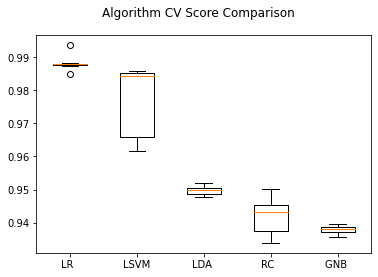

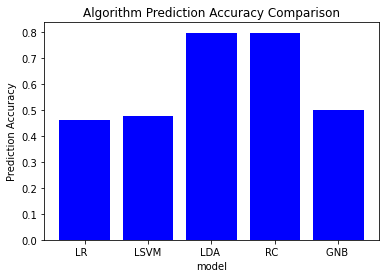

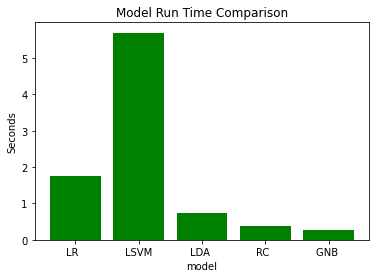

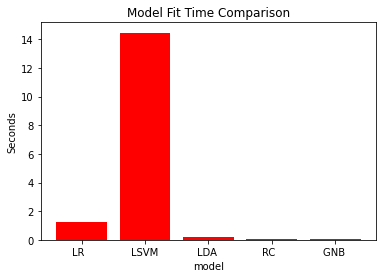

In [ ]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, StratifiedShuffleSplit, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import time
import seaborn as sns
import matplotlib.pyplot as plt    


# check we have the expected number of dimensions
print(Feature_List)
print(Gen_Feat_Train[Feature_List].columns.values)
print(Gen_Feat_Test[Feature_List].columns.values)

# prepare models
models = []
models.append(('LR  ', LogisticRegression(solver='liblinear', C=1.25)))
models.append(('LSVM', LinearSVC()))
models.append(('LDA ', LinearDiscriminantAnalysis(solver='lsqr')))
models.append(('RC  ', RidgeClassifier()))
models.append(('GNB ', GaussianNB()))

# models.append(('CART', DecisionTreeClassifier()))
# models.append(('KNN ', KNeighborsClassifier()))
# models.append(('XGB ', XGBClassifier()))  # too slow :-(
# models.append(('ADA ', AdaBoostClassifier()))  # too slow :-(
# models.append(('RFC ', RandomForestClassifier()))   # too slow :-(
# models.append(('MLP ', MLPClassifier()))            # too slow :-(


# evaluate each model in turn
results = []
results_2 = []
fit_time_list = []
run_time_list = []
names = []
scoring = 'accuracy'
# scoring = 'f1'


for name, model in models:

  # find the most appropriate cross validation for the data structure
  # split into k folds (ShuffleSplit is most suited to the data)
  # kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
  # kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
  # kfold = StratifiedShuffleSplit(n_splits=10, test_size=(40158/97044), random_state=seed) #not needed - dataset is balanced
  kfold = ShuffleSplit(n_splits=10, test_size=(40158/97044), random_state=seed)


  # fit model to the training set selected features (setting timer)
  start = time.time()
  model.fit(Gen_Feat_Train[Feature_List], y_train.np) 
  fit_time = time.time()


  # make predictiionis on the test set
  predictions = model.predict(Gen_Feat_Test[Feature_List])

  # perform cross validation scoriing on the test set transformed features
  cv_results = cross_val_score(model, Gen_Feat_Test[Feature_List], y_test.np, cv=kfold, scoring=scoring)
  end = time.time()



  # add results to lists
  results.append(cv_results)
  fit_time_list.append(round(fit_time-start, 4))
  run_time_list.append(round(end-fit_time, 4))
  fittime = str(round(fit_time-start, 4))+'s fit-time'
  runtime = str(round(end-fit_time, 4))+'s run-time on test set'

  # score the predictions
  percentage = round(model.score(Gen_Feat_Test[Feature_List], y_test.np),6) # <<<<<<<<<<<<<<
  percentage_str = str(percentage)+'% prediction accuracy'
  results_2.append(percentage)
  names.append(name)

  # make predictiionis on the test set
  predictions = model.predict(Gen_Feat_Test[Feature_List])

  # create confusion matric
  response = confusion_matrix(y_test.np, predictions)
  # print("Confusion Matrix")
  # print(response)
  # print(f"Test Set: {len(Gen_Feat_Test)}")
  # print('TP    =',response[0][0])
  # print('FP    =',response[0][1])
  # print('FN    =',response[1][0])
  # print('TN    =',response[1][1])
  # print(f"Accuracy  = {percentage*100} %")
  F1 = (2*response[0][0])/((2*response[0][0])+response[0][1]+response[1][0])
  # print(f"F1 score  = {F1*100} %")
  Precision = (response[0][0]/(response[0][0]+response[0][1]))
  # print(f"Precision = {Precision*100} %")
  FAR = (response[0][1]/(response[1][1] + response[0][1]))
  # print(f"FAR score = {FAR*100} %")
  DR = (response[0][0]/(response[0][0] + response[1][0]))
  # print(f"DR score  = {DR*100} %")


  # # print results
  # msg = "%s:  %f CV Score | %f StDv | %s  | %s  | %s" % (name, cv_results.mean(), cv_results.std(), fittime, runtime, percentage_str) 
  # print(msg)

  # print results
  msg = "%s:  %f CV Score | %f StDv | Accuracy: %f | F1 score: %f | Precision: %f  | FAR score: %f | DR score : %f  | %s  | %s  " % (name, cv_results.mean(), cv_results.std(), percentage, F1, Precision, FAR,  DR,  fittime, runtime) 
  print(msg)
 

  # # print comfusion matrix
  # ax= plt.subplot()
  # sns.heatmap(response, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
  # # labels, title and ticks
  # ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  # ax.set_title('Confusion Matrix'); 
  # ax.xaxis.set_ticklabels(['intrusion', 'normal']); ax.yaxis.set_ticklabels(['intrusion', 'normal']);



# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm CV Score Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# barchart for prediction accuracy
plt.bar(names, results_2, color='b')
plt.plot()
plt.xlabel("model")
plt.ylabel("Prediction Accuracy")
plt.title("Algorithm Prediction Accuracy Comparison")
plt.show()

# barchart for model run-time
plt.bar(names, run_time_list, color='g')
plt.plot()
plt.xlabel("model")
plt.ylabel("Seconds")
plt.title("Model Run Time Comparison")
plt.show()

# barchart for model fit-time
plt.bar(names, fit_time_list, color='r')
plt.plot()
plt.xlabel("model")
plt.ylabel("Seconds")
plt.title("Model Fit Time Comparison")
plt.show()




# ------OPTIMISATION OF CLASSIFIERS------------------------------------------------------------------

# 23) **LinearSVM** Classifier BayesSearchCV Hyperparameter Optimisation 



In [ ]:
from skopt import BayesSearchCV
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

kfold = ShuffleSplit(n_splits=10, test_size=(40158/97044), random_state=7)


opt = BayesSearchCV(
    LinearSVC(),
    {
        'penalty': ['l1','l2'],  # categorical parameter
        'loss': ['squared_hinge','hinge'],  # categorical parameter
        'C': (1e-6, 1e+6, 'log-uniform'),
        'tol': (1e-4, 1e+1, 'log-uniform'),
    },
    n_iter=32,
    cv=kfold,
    scoring = 'f1'
)



print(Gen_Feat_Train[Feature_List].shape)
print(len(y_train.np))

opt.fit(Gen_Feat_Train[Feature_List], y_train.np)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(Gen_Feat_Test[Feature_List], y_test))
print("test Parameters: %s" % opt.best_params_)


'''
penalty {‘l1’, ‘l2’}, default=’l2’
        Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.

loss  {‘hinge’, ‘squared_hinge’}, default=’squared_hinge’
        Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss. The combination of penalty='l1' and loss='hinge' is not supported.

dual    bool, default=True
      Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.

tol   float, default=1e-4
      Tolerance for stopping criteria.

C   float, default=1.0
      Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

multi_class {‘ovr’, ‘crammer_singer’}, default=’ovr’
      Determines the multi-class strategy if y contains more than two classes. "ovr" trains n_classes one-vs-rest classifiers, while "crammer_singer" optimizes a joint objective over all classes. While crammer_singer is interesting from a theoretical perspective as it is consistent, it is seldom used in practice as it rarely leads to better accuracy and is more expensive to compute. If "crammer_singer" is chosen, the options loss, penalty and dual will be ignored.

fit_intercept bool, default=True
      Whether to calculate the intercept for this model. If set to false, no intercept will be used in calculations (i.e. data is expected to be already centered).

intercept_scaling   float, default=1
      When self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equals to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic feature weight Note! the synthetic feature weight is subject to l1/l2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) intercept_scaling has to be increased.

class_weight    dict or ‘balanced’, default=None
      Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

verbose int, default=0
      Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in liblinear that, if enabled, may not work properly in a multithreaded context.

random_state  int, RandomState instance or None, default=None
      Controls the pseudo random number generation for shuffling the data for the dual coordinate descent (if dual=True). When dual=False the underlying implementation of LinearSVC is not random and random_state has no effect on the results. Pass an int for reproducible output across multiple function calls. See Glossary.

max_iter  int, default=1000
      The maximum number of iterations to be run.
'''



(97044, 10)
97044
val. score: 0.9707779342105601
test score: 0.9465047742543912
test Parameters: OrderedDict([('C', 130.9984139078651), ('loss', 'squared_hinge'), ('tol', 0.3841671161174082)])


'\n\n'

# 24) **Logistic Regression** Classifier BayesSearchCV Hyperparameter Optimisation 


In [ ]:
from skopt import BayesSearchCV
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

kfold = ShuffleSplit(n_splits=10, test_size=(40158/97044), random_state=7)


# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    LogisticRegression(),
    {
        # 'penalty': ('l1', 'l2', 'elasticnet', None),   # categorical parameter
        # 'dual': (True, False),   # categorical Bool parameter        
        'C': (0.5, 100, 'log-uniform'), # float
        'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),   # categorical parameter
        # 'fit_intercept': (True, False),   # categorical Bool parameter
        # 'class_weight': ('balanced', None),   # categorical parameter
        # 'random_state': (1),  # integer valued parameter
        # 'max_iter': (100),  # integer valued parameter
        # 'multi_class': ('auto', 'ovr', 'multinomial'),   # categorical parameter
        # 'warm_start': (True, False),   # categorical Bool parameter
        # 'n_jobs': (None),  # integer valued parameter
        # 'l1_ratio': (0, 1, 'log-uniform'), # only used for elesticnet
    },
    n_iter=32,
    cv=kfold,
    scoring = 'f1'
)



print(Gen_Feat_Train[Feature_List].shape)
print(len(y_train.np))


opt.fit(Gen_Feat_Train[Feature_List], y_train.np)

print("val. score: %s" % opt.best_score_)
# print("cv_results: %s" % opt.cv_results_)
print("test score: %s" % opt.score(Gen_Feat_Test[Feature_List], y_test))
print("test Parameters: %s" % opt.best_params_)



'''
penalty {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
        Specify the norm of the penalty:
          'none': no penalty is added;
          'l2': add a L2 penalty term and it is the default choice;
          'l1': add a L1 penalty term;
          'elasticnet': both L1 and L2 penalty terms are added.

        Warning Some penalties may not work with some solvers. See the parameter solver below, to know the compatibility between the penalty and solver.
        New in version 0.19: l1 penalty with SAGA solver (allowing ‘multinomial’ + L1)

dual   bool, default=False
        Dual or primal formulation. 
        Dual formulation is only implemented for l2 penalty with liblinear solver. 
        Prefer dual=False when n_samples > n_features.

tol   float, default=1e-4
      Tolerance for stopping criteria.

C   float, default=1.0
      Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

fit_intercept   bool, default=True
      Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

intercept_scaling   float, default=1
      Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True. In this case, x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equal to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic_feature_weight.

      Note! the synthetic feature weight is subject to l1/l2 regularization as all other features. 
      To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) intercept_scaling has to be increased.

class_weight    dict or ‘balanced’, default=None
      Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
      The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
      Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.
      New in version 0.17: class_weight=’balanced’

random_state  int, RandomState instance, default=None
      Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data. See Glossary for details.

solver  {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
      Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
      For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
      For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
      ‘liblinear’ is limited to one-versus-rest schemes.

      Warning The choice of the algorithm depends on the penalty chosen: Supported penalties by solver:
          ‘newton-cg’ - [‘l2’, ‘none’]
          ‘lbfgs’ - [‘l2’, ‘none’]
          ‘liblinear’ - [‘l1’, ‘l2’]
          ‘sag’ - [‘l2’, ‘none’]
          ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

      Note ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.
      See also Refer to the User Guide for more information regarding LogisticRegression and more specifically the Table summarazing solver/penalty supports. <!– # noqa: E501 –>
      New in version 0.17: Stochastic Average Gradient descent solver.

      New in version 0.19: SAGA solver.
      Changed in version 0.22: The default solver changed from ‘liblinear’ to ‘lbfgs’ in 0.22.

max_iter  int, default=100
      Maximum number of iterations taken for the solvers to converge.

multi_class   {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
      If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.
      New in version 0.18: Stochastic Average Gradient descent solver for ‘multinomial’ case.
      Changed in version 0.22: Default changed from ‘ovr’ to ‘auto’ in 0.22.

verbose   int, default=0
    For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.

warm_start  bool, default=False
    When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Useless for liblinear solver. See the Glossary.
    New in version 0.17: warm_start to support lbfgs, newton-cg, sag, saga solvers.

n_jobs  int, default=None
    Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the solver is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

l1_ratio  float, default=None
    The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.
'''

(97044, 10)
97044
val. score: 0.9924347273837466
test score: 0.9541437385359347
test Parameters: OrderedDict([('C', 100), ('solver', 'lbfgs')])


"\npenalty {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’\n        Specify the norm of the penalty:\n          'none': no penalty is added;\n          'l2': add a L2 penalty term and it is the default choice;\n          'l1': add a L1 penalty term;\n          'elasticnet': both L1 and L2 penalty terms are added.\n\n        Warning Some penalties may not work with some solvers. See the parameter solver below, to know the compatibility between the penalty and solver.\n        New in version 0.19: l1 penalty with SAGA solver (allowing ‘multinomial’ + L1)\n\ndual   bool, default=False\n        Dual or primal formulation. \n        Dual formulation is only implemented for l2 penalty with liblinear solver. \n        Prefer dual=False when n_samples > n_features.\n\ntol   float, default=1e-4\n      Tolerance for stopping criteria.\n\nC   float, default=1.0\n      Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger re

# 25) **Logistic Regression** Classifier (optimised)

Test Set Cross Validation Accuracy: 98.328% (StDv: 0.050%)
Confusion Matrix
[[19934   145]
 [    6 20073]]
Test Set: 40158
TP    = 19934
FP    = 145
FN    = 6
TN    = 20073
Accuracy  = 99.62398525823 %
F1 score  = 99.622679227367 %
Precision = 99.27785248269336 %
FAR score = 0.7171827084775941 %
DR score  = 99.96990972918756 %


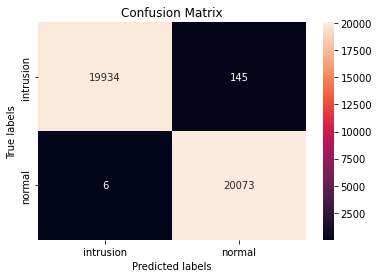

In [ ]:
# Logistic Regression Classification
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.linear_model import LogisticRegression

# Gen_Feat_Train
# Gen_Feat_Test

# create model
LogReg_Model = LogisticRegression(solver='liblinear', C=1.25) # Settings found by trial and error
# LogReg_Model = LogisticRegression(C = 10, class_weight = 'balanced', fit_intercept = False, solver = 'saga', warm_start = True  ) # Settings From BayesSearchCV Optimisation
# LogReg_Model = LogisticRegression(solver='liblinear', C=73) # Settings found by BayesSearchCV Optimisation
# LogReg_Model = LogisticRegression(solver='lbfgs', C=100) # Settings found by BayesSearchCV Optimisation



# train model on the training set
LogReg_Model.fit(Gen_Feat_Train[Feature_List], y_train.np)

# make predictiionis on the test set
predictions = LogReg_Model.predict(Gen_Feat_Test[Feature_List])

# score the predictions
percentage = LogReg_Model.score(Gen_Feat_Test[Feature_List], y_test.np)

################################################################################
# cross validation score
num_folds = 10
seed = 7
scoring = 'f1'
kfold = ShuffleSplit(n_splits=10, test_size=(40158/97044), random_state=seed)
cv_results = cross_val_score(LogReg_Model, Gen_Feat_Test[Feature_List], y_test.np, cv=kfold, scoring=scoring)
print("Test Set Cross Validation Accuracy: %.3f%% (StDv: %.3f%%)" % (cv_results.mean()*100.0, cv_results.std()*100.0))
################################################################################



# create confusion matric
response = confusion_matrix(y_test.np, predictions)
print("Confusion Matrix")
print(response)
print(f"Test Set: {len(Gen_Feat_Test[Feature_List])}")
print('TP    =',response[0][0])
print('FP    =',response[0][1])
print('FN    =',response[1][0])
print('TN    =',response[1][1])
print(f"Accuracy  = {percentage*100} %")
F1 = (2*response[0][0])/((2*response[0][0])+response[0][1]+response[1][0])
print(f"F1 score  = {F1*100} %")
Precision = (response[0][0]/(response[0][0]+response[0][1]))
print(f"Precision = {Precision*100} %")
FAR = (response[0][1]/(response[1][1] + response[0][1]))
print(f"FAR score = {FAR*100} %")
DR = (response[0][0]/(response[0][0] + response[1][0]))
print(f"DR score  = {DR*100} %")


import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot()
sns.heatmap(response, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['intrusion', 'normal']); ax.yaxis.set_ticklabels(['intrusion', 'normal']);

# 26) **LinnearSVM** Classifier (optimised)

Test Set Cross Validation Accuracy: 99.480% (StDv: 0.039%)
Confusion Matrix
[[19873   206]
 [    6 20073]]
Test Set: 40158
TP    = 19873
FP    = 206
FN    = 6
TN    = 20073
Accuracy  = 99.47208526321032 %
F1 score  = 99.46944291506081 %
Precision = 98.97405249265402 %
FAR score = 1.015829182898565 %
DR score  = 99.96981739524121 %


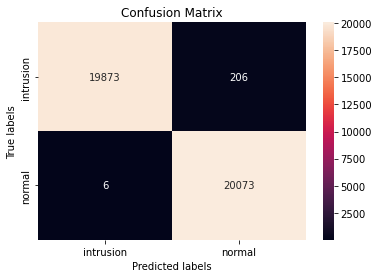

In [ ]:
# Logistic Regression Classification
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.linear_model import LogisticRegression

# Gen_Feat_Train
# Gen_Feat_Test

# create model
# LSVM_Model = LinearSVC(C = 130.9984139078651, loss = 'squared_hinge', tol =  0.3841671161174082) # Settings found by BayesSearchCV Optimisationo for lowest Cros Val f1
LSVM_Model = LinearSVC() # Settings found by trial and error




# train model on the training set
LSVM_Model.fit(Gen_Feat_Train[Feature_List], y_train.np)

# make predictiionis on the test set
predictions = LSVM_Model.predict(Gen_Feat_Test[Feature_List])

# score the predictions
percentage = LSVM_Model.score(Gen_Feat_Test[Feature_List], y_test.np)

################################################################################
# cross validation score
num_folds = 10
seed = 7
scoring = 'f1'
kfold = ShuffleSplit(n_splits=10, test_size=(40158/97044), random_state=seed)
cv_results = cross_val_score(LSVM_Model, Gen_Feat_Test[Feature_List], y_test.np, cv=kfold, scoring=scoring)
print("Test Set Cross Validation Accuracy: %.3f%% (StDv: %.3f%%)" % (cv_results.mean()*100.0, cv_results.std()*100.0))
################################################################################



# create confusion matric
response = confusion_matrix(y_test.np, predictions)
print("Confusion Matrix")
print(response)
print(f"Test Set: {len(Gen_Feat_Test[Feature_List])}")
print('TP    =',response[0][0])
print('FP    =',response[0][1])
print('FN    =',response[1][0])
print('TN    =',response[1][1])
print(f"Accuracy  = {percentage*100} %")
F1 = (2*response[0][0])/((2*response[0][0])+response[0][1]+response[1][0])
print(f"F1 score  = {F1*100} %")
Precision = (response[0][0]/(response[0][0]+response[0][1]))
print(f"Precision = {Precision*100} %")
FAR = (response[0][1]/(response[1][1] + response[0][1]))
print(f"FAR score = {FAR*100} %")
DR = (response[0][0]/(response[0][0] + response[1][0]))
print(f"DR score  = {DR*100} %")


import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot()
sns.heatmap(response, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['intrusion', 'normal']); ax.yaxis.set_ticklabels(['intrusion', 'normal']);